I recommend installing Anaconda for ease:
https://www.continuum.io/downloads
certain packages i.e. seaborn, do not come with the standard installation. A simple search for
how to 'install seaborn with anaconda' will easily find the installation instructions.
i.e. in this case:
http://seaborn.pydata.org/installing.html
in terminal (mac):
conda install seaborn

Alexandru Agachi
m.a.agachi@gmail.com  
Background: pursued degrees and graduate and postgraduate diplomas in international relations, energy science,
surgical robotics, neuro anatomy and imagery, and biomedical innovation
Working with a data driven firm in London that operates on financial markets, and teaching a big data module in the
biomedical innovation degree at Pierre et Marie Curie University in Paris.

# Why

Why statistics

Why focus on data
> Better to be in an expanding world and not quite in exactly the right field, than to be in a contracting world 
> where people's worst behavior comes out.  
Eric Weinstein, Fellow University of Oxford, MD Thiel Capital.

Why healthcare
Ripe for data analysis
30% of world's data
> The biomedical sciences have been the pillar of the health care system for a long time now. The new system will have 
> two equal pillars — the biomedical sciences and the data sciences.  
Dr Scott Zeger, Johns Hopkins University.

# Roadmap - Blueprint for statistical data exploration

In [3]:
#import the packages we will use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#use simplest tool available
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import statsmodels.api as sm
import scipy.stats
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn import preprocessing
#from sklearn.linear_model import LassoLarsCV
#from sklearn.cluster import KMeans
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)

#Whenever you are not sure of a function or parameter used, please verify documentation for that function at:
#http://pandas.pydata.org/pandas-docs/stable/

//anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


All credit for the data, and our many thanks, go to the principal investigators who collected this data 
and made it available:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Online repositories for data used and for this notebook:

http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/
https://github.com/AlexandruAgachi/introductory_statistics_tutorial/blob/master/Introductory%20statistical%20data%20analysis%20with%20pandas%20PyData%20Berlin%202017.ipynb

here specify your own directory for where you stored the datasets on your computer:

For me: cd Downloads/Heart disease dataset

note: when downloading the datasets, some people had to rename them manually with a 'txt' ending
the four data files that interest us should be named:

processed.cleveland.data.txt
processed.hungarian.data.txt
processed.switzerland.data.txt
processed.va.data.txt

Data management is an integral part of your research process  
Choices you make here will influence your entire study

In [20]:
#let's load the first dataset in pandas with the read_csv function. This will create pandas dataframe objects per below.
cleveland = pd.read_csv('processed.cleveland.data.txt', header=None)

In [93]:
cleveland.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [25]:
hungary = pd.read_csv('processed.hungarian.data.txt', header=None)

In [26]:
hungary.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
5,32,0,2,105,198,0,0,165,0,0.0,?,?,?,0
6,32,1,2,110,225,0,0,184,0,0.0,?,?,?,0
7,32,1,2,125,254,0,0,155,0,0.0,?,?,?,0
8,33,1,3,120,298,0,0,185,0,0.0,?,?,?,0
9,34,0,2,130,161,0,0,190,0,0.0,?,?,?,0


In [27]:
switzerland = pd.read_csv('processed.switzerland.data.txt', header=None)

In [28]:
switzerland.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
5,38,0,4,110,0,0,0,156,0,0,2,?,3,1
6,38,1,3,100,0,?,0,179,0,-1.1,1,?,?,0
7,38,1,3,115,0,0,0,128,1,0,2,?,7,1
8,38,1,4,135,0,?,0,150,0,0,?,?,3,2
9,38,1,4,150,0,?,0,120,1,?,?,?,3,1


In [30]:
va = pd.read_csv('processed.va.data.txt', header=None)

In [31]:
va.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
5,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
6,65,1,4,150,236,1,1,105,1,0,?,?,?,3
7,60,1,3,180,0,0,1,140,1,1.5,2,?,?,0
8,60,1,3,120,0,?,0,141,1,2,1,?,?,3
9,60,1,2,160,267,1,1,157,0,0.5,2,?,?,1


In [37]:
df = pd.concat([cleveland, hungary, va, switzerland])

In [38]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56.0,1.0,2.0,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62.0,0.0,4.0,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57.0,0.0,4.0,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63.0,1.0,4.0,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53.0,1.0,4.0,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [57]:
#we rename all columns to make them more legible
df.columns = ['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs', 'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression', 'slope', 'fluoroscopy',
             'defect', 'diagnosis']

In [603]:
#let's look at our dataframe. the head(10) option tells pandas to return only the first ten rows of our dataframe.
df.head(10)

,age,sex,chest_pain,rest_bp,cholesterol,fasting_bs,rest_ecg,max_heart_rate,exercise_angina,st_depression,slope,fluoroscopy,defect,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


# What sort of study was this?

A. Observational or experimental

Observational and experimental data

to know if your data is obersevational or experimental, you ask if the explanatory variable was manipulated or not

In a true experiment, 3 conditions:
1. only one variable is manipulated
2. we have a control group
3. random* assignment (analysis stage in randomized trials: check clss imbalances, and if any found consider incl. 
in model as explanatory variables, for statistical control). In theory, in this case one could determine causality.

Quasi experiment:
1. only one variable is manipulated
2. control group
3. no random assignment; groups pre selected. i.e. drug users study.
To improve a quasi experimental design: add confounding variables; have a control group; use a pre-test/post-test 
design confounder=control variable=covariate=third variable=lurking variable

in an observational study the regression line only describes data you see. it cannot be used to predict result of 
intervention


*randomization works best as your sample size approaches infinity. for small sizes, imbalances in the groups
can occur.

B. Longitudinal or cross sectional

Then data analysis? Wrong!

Background research. Always starts with background research. Domain knowledge.

We quickly find three studies using this dataset:

Detrano et al.: http://www.ajconline.org/article/0002-9149(89)90524-9/pdf
Sundaram and Kakade: http://www2.rmcil.edu/dataanalytics/v2015/papers/Clinical_Decision_Support_For_Heart_Disease.pdf
Soni et al.: http://www.enggjournals.com/ijcse/doc/IJCSE11-03-06-120.pdf

Value the time of domain experts.
Dataset we'll focus on today. look at txt file AND at explanation

First stage in a study is always exploratory data analysis
We typically receive the data without context, in a raw file that we cannot easily interpret
The five steps of exploratory data analysis
1. ?
2. organizing and summarizing the data
3. Looking for important features and patterns
4. Looking for exceptions
5. Interpreting these findings in the context of the research question at hand

This can be summarized in a notebook or even an initial data report for everyone involved in the data project

In [378]:
print(len(df))

920


In [379]:
print(len(df.columns))

14


number of observations to variables largely exceeds heuristic rule of 5 to 1  
see Victoria Stodden (2006) for a discussion of why this is important  
https://web.stanford.edu/~vcs/thesis.pdf

convert all variables to numeric ones

In [60]:
#mark all variables as numeric data, and signify, for the relevant ones, that they are categorical rather than 
#quantitative variables
#errors='coerce' tells pandas to return invalid values as NaN rather than as the input values themselves
#crucial to do this step otherwise subsequent analyses will not work properly. i.e. pandas would interpret missing 
#values as strings
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['sex'] = pd.to_numeric(df['sex'], errors='coerce').astype('category')
df['chest_pain'] = pd.to_numeric(df['chest_pain'], errors='coerce').astype('category')
df['rest_bp'] = pd.to_numeric(df['rest_bp'], errors='coerce')
df['cholesterol'] = pd.to_numeric(df['cholesterol'], errors='coerce')
df['fasting_bs'] = pd.to_numeric(df['fasting_bs'], errors='coerce').astype('category')
df['rest_ecg'] = pd.to_numeric(df['rest_ecg'], errors='coerce').astype('category')
df['max_heart_rate'] = pd.to_numeric(df['max_heart_rate'], errors='coerce')
df['exercise_angina'] = pd.to_numeric(df['exercise_angina'], errors='coerce').astype('category')
df['st_depression'] = pd.to_numeric(df['st_depression'], errors='coerce')
df['slope'] = pd.to_numeric(df['slope'], errors='coerce').astype('category')
df['fluoroscopy'] = pd.to_numeric(df['fluoroscopy'], errors='coerce').astype('category')
df['defect'] = pd.to_numeric(df['defect'], errors='coerce').astype('category')
df['diagnosis'] = pd.to_numeric(df['diagnosis'], errors='coerce').astype('category')

# let's check for missing/outlier values

Why bother?
Nearly all statistical methods assume complete information. In the presence of missing data:
1. parameter estimates may be biased*
2. statistical power weakens
3. precision of confidence intervals is diminished

Three types of missing variables:
1. Missing completely at random (MCAR): p(missing data on Y) independent of p(Y value) or p(other variables values)
but: p(missing data on Y) may be linked to p(missing data on other variables in dataset))
2. Missing at random (MAR): p(missing data on Y) independent of value of Y after controlling for other variables
3. Not missing at random (NMAR)

If MAR, missing data is ignorable and there is no need to model missing data mechanism
if NMAR, missing data mechanism is not ignorable and one must develop v good understanding of missing data process to model it

Standard options:
1. listwise deletion. works well if MCAR, which is rarely true, and can delete significant part of our sample
2. imputation.
2.a. marginal mean imputation: leads to biased estimates of variance and covariance and should be avoided
2.b. conditional mean imputation: we regress missing values on values of all other variables present in dataset.
     MCAR assumption. Generalized least squares usually shows good results.
Overall issue with imputation methods: underestimate standard errors and overstimate test statistics.

Advanced options:
1. Multiple imputation
2. Maximum likelihood
3. Bayesian simulation
4. Hot deck (selects at random, with replacement, a value from observations with similar values for other variables)

For a great discussion of missing data:
http://www.bu.edu/sph/files/2014/05/Marina-tech-report.pdf

Statsmodels and Scikit learn imputation functions:
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html
http://www.statsmodels.org/dev/imputation.html

At this point in time, pandas, scikit learn and statsmodels offer relatively poor methods of data imputation. You
therefore will need to manually create your processes. But this will be worth your time!

"The only really good solution to the missing data problem is not to have any. So in the design and execution of 
research projects, it is essential to put great effort into minimizing the occurrence of missing data. 
Statistical adjustments can never make up for sloppy research." Paul Allison, 2001.

*Bias affects all measurements the same way, while chance errors vary from measurement to measurement
therefore bias cannot be noticed by looking just at measurements, we need an external/theoretical
benchmark as well. Bias is often discussed in conjunction with variance.

Now we go through each variable in our dataset one by one. We check for missing values if any, how many, and what %
of total values they represent for each variable. For this we use:
isnull() function checks for missing values
value_counts() counts them
we also look at what values our variables take, by applying the value_counts() function directly, without isnull()

In [5]:
df['age'].isnull().value_counts()

NameError: name 'df' is not defined

In [65]:
df['sex'].isnull().value_counts()

False    920
Name: sex, dtype: int64

In [66]:
df['sex'].value_counts()

1.0    726
0.0    194
Name: sex, dtype: int64

In [381]:
#the normalize = True parameter returns for us the % of total rather than the absolute number.
df['sex'].value_counts(normalize=True)

1.0    0.78913
0.0    0.21087
Name: sex, dtype: float64

In [67]:
df['chest_pain'].isnull().value_counts()

False    920
Name: chest_pain, dtype: int64

In [68]:
df['chest_pain'].value_counts()

4.0    496
3.0    204
2.0    174
1.0     46
Name: chest_pain, dtype: int64

In [69]:
df['rest_bp'].isnull().value_counts()

False    861
True      59
Name: rest_bp, dtype: int64

In [608]:
#we divide by len(df), to manually calculate the % of total observations that this represents each time.
df['rest_bp'].isnull().value_counts()/len(df)

False    0.93587
True     0.06413
Name: rest_bp, dtype: float64

In [71]:
df['cholesterol'].isnull().value_counts()

False    890
True      30
Name: cholesterol, dtype: int64

In [386]:
df['cholesterol'].isnull().value_counts()/len(df)

False    0.967391
True     0.032609
Name: cholesterol, dtype: float64

In [72]:
df['fasting_bs'].isnull().value_counts()

False    830
True      90
Name: fasting_bs, dtype: int64

In [387]:
df['fasting_bs'].isnull().value_counts()/len(df)

False    0.902174
True     0.097826
Name: fasting_bs, dtype: float64

In [541]:
#standard value_counts() function drops missing values. To avoid this you can add dropna=False argument to function.
df['fasting_bs'].value_counts()

0.0    692
1.0    138
Name: fasting_bs, dtype: int64

In [388]:
df['rest_ecg'].isnull().value_counts()/len(df)

False    0.997826
True     0.002174
Name: rest_ecg, dtype: float64

In [75]:
df['rest_ecg'].value_counts()

0.0    551
2.0    188
1.0    179
Name: rest_ecg, dtype: int64

In [76]:
df['max_heart_rate'].isnull().value_counts()

False    865
True      55
Name: max_heart_rate, dtype: int64

In [389]:
df['max_heart_rate'].isnull().value_counts()/len(df)

False    0.940217
True     0.059783
Name: max_heart_rate, dtype: float64

In [78]:
df['exercise_angina'].isnull().value_counts()

False    865
True      55
Name: exercise_angina, dtype: int64

In [390]:
df['exercise_angina'].isnull().value_counts()/len(df)

False    0.940217
True     0.059783
Name: exercise_angina, dtype: float64

In [79]:
df['exercise_angina'].value_counts()

0.0    528
1.0    337
Name: exercise_angina, dtype: int64

In [80]:
df['st_depression'].isnull().value_counts()

False    858
True      62
Name: st_depression, dtype: int64

In [391]:
df['st_depression'].isnull().value_counts()/len(df)

False    0.932609
True     0.067391
Name: st_depression, dtype: float64

In [82]:
df['slope'].isnull().value_counts()

False    611
True     309
Name: slope, dtype: int64

In [392]:
df['slope'].isnull().value_counts()/len(df)

False    0.66413
True     0.33587
Name: slope, dtype: float64

In [83]:
df['slope'].value_counts()

2.0    345
1.0    203
3.0     63
Name: slope, dtype: int64

In [84]:
df['fluoroscopy'].isnull().value_counts()

True     611
False    309
Name: fluoroscopy, dtype: int64

In [393]:
df['fluoroscopy'].isnull().value_counts()/len(df)

True     0.66413
False    0.33587
Name: fluoroscopy, dtype: float64

In [85]:
df['fluoroscopy'].value_counts()

0.0    181
1.0     67
2.0     41
3.0     20
Name: fluoroscopy, dtype: int64

In [86]:
df['defect'].isnull().value_counts()

True     486
False    434
Name: defect, dtype: int64

In [394]:
df['defect'].isnull().value_counts()/len(df)

True     0.528261
False    0.471739
Name: defect, dtype: float64

In [87]:
df['defect'].value_counts()

3.0    196
7.0    192
6.0     46
Name: defect, dtype: int64

In [88]:
df['diagnosis'].isnull().value_counts()

False    920
Name: diagnosis, dtype: int64

In [89]:
df['diagnosis'].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: diagnosis, dtype: int64

In [395]:
len(df.columns)

14

In [90]:
#the variables slope, defect and fluoroscopy have 33-47% of missing values
#context. Why?
#can we correct for this without introducing other biases into our dataset?
#Here we will decide to eliminate these variables.
#Data analysts are mere mortals too. Cannot fix everything.
df_red = df[['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs', 'rest_ecg', 'max_heart_rate', 
            'exercise_angina', 'st_depression', 'diagnosis']]

In [126]:
len(df_red)

920

In [ ]:
#rest_bp, cholesterol, fasting_bs, rest_ecg, max_heart_rate, exercise_angina, st_depression

In [173]:
#rest_ecg is a categorical variable with only 2% of missing values.
#we make the choice to impute missing values with a straightforward method: the mode
#we are conscious this may introduce biases but due to low number of missing values, in what is
#a small range categorical variable (no extreme outliers possible) we feel comfortable doing this
df_red['rest_ecg'].fillna(df_red['rest_ecg'].mode().iloc[0], inplace=True)

//anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [174]:
df_red['rest_ecg'].isnull().value_counts()

False    920
Name: rest_ecg, dtype: int64

In [278]:
#let's see if there is any overlap between missing variables relative to observations, and what would happen if we 
#were to limit our dataset to observations with non missing values
df_clean = df_red[df_red['rest_bp'].notnull() & df_red['cholesterol'].notnull() & df_red['fasting_bs'].notnull() & df['max_heart_rate'].notnull() & df['exercise_angina'].notnull() &
                    df['st_depression'].notnull()]

In [396]:
len(df_clean)

741

In [189]:
df_clean.isnull().any()

age                False
sex                False
chest_pain         False
rest_bp            False
cholesterol        False
fasting_bs         False
rest_ecg           False
max_heart_rate     False
exercise_angina    False
st_depression      False
diagnosis          False
dtype: bool

this is not approach we would use in a real world study, but for exploratory purposes in this tutorial
we can retain 85% of observations that were properly recorded regarding all variables
I will add here an example with conditional mean imputation for one of the variables
Statsmodels very limited in options = very manual work.
From version 0.8.0 onwards MICE function.

now that we cleaned the data we can move on to univariate analysis - one variable at a time

data reporting tells you what is happening, but data analysis tells you why it is happening


Descriptive statistics

a parameter is calculated from the population, while a statistic from a sample

In studying samples, we assume the Central Limit Theorem holds: if you draw enough samples, from
a population, and each sample is large enough, the distribution of the statistics of the samples
will be normally distributed.
normal curve discovered around 1720 by Abraham de Moivre. Around 1870, Adolph Quetelet thought
of using it as the curve of an ideal histogram

center-spread-shape
3 measures of center: mean, median and mode
1 measure of spread: standard deviation
2 attributes of shape: 
1. symmetry or skewness. skewed right (i.e. salaries), skewed left (i.e. age of natural deaths)
2. modality or peakness: unimodal, bimodal, uniform...

now we will aim to get an idea of the shape, center, and spread of these variables
we will analyze the shape visually by checking for modality and skewness
we will check for measures of center such as mean, median and mode
we will check the spread through the standard deviation for quantitative variables

standard deviation: how far away observations are from their average
in a normal distribution roughly 68% are within 1 SD and 95% within 2 SDs.

Quantitative variables
shape, center and spread 
histogram

Categorical variables
mode
bar chart or frequency distribution

# rules for visualizing data:

for visualizing one variable: 
if it is categorical we use a bar chart i.e. sns's countplot function
if it is quantitative, we can combine a kernel density estimate and a histogram with sns's distplot function

for visualizing two variables:
C-Q: bivariate bar graph with sns factorplot (bin/collapse explanatory variable), categories on x axis, and mean of 
response variable on y axis
Q-Q: scatterplot with sns regplot
C-C: you can plot them one a time. problem with a bivariate graph is that mean has no meaning in context of a 
categorical variable

for further reading:
http://sphweb.bumc.bu.edu/otlt/mph-modules/bs/datapresentation/DataPresentation7.html

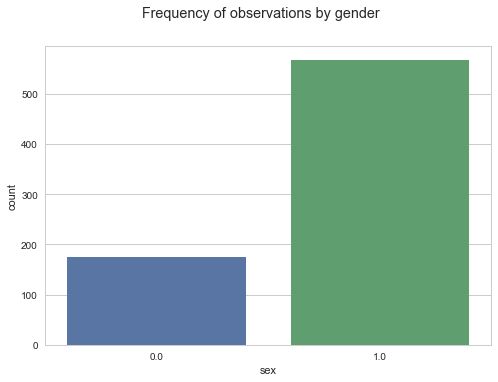

In [522]:
#Gender
#given that gender is a categorical variable, we use a countplot to visualize it
#we always plot the variable of interest on the x axis, and the count or frequency on the y axis
sns.countplot(x='sex', data = df_clean)
plt.suptitle('Frequency of observations by gender')

the results definitely suggest a discussion about class imbalance is in order here.

In [194]:
#Diagnosis
#we check the counts per each value of the variable. sort=False tells pandas not to sort the results by values. 
#normalize = True tells it to return the relative frequencies rather than the absolute counts
#if we had not cleaned the data, we could add parameter dropna=False so that value_counts does not drop null values
df_clean['diagnosis'].value_counts(sort=False, normalize=True)

0    0.481781
1    0.276653
2    0.106613
3    0.105263
4    0.029690
Name: diagnosis, dtype: float64

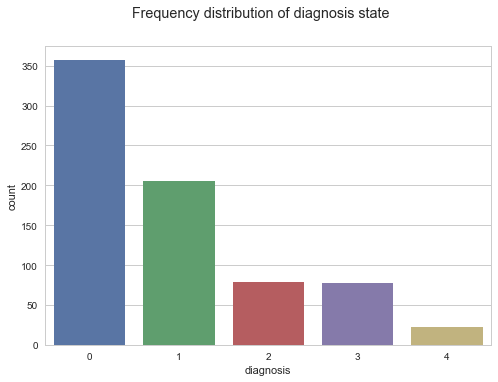

In [410]:
sns.countplot(x='diagnosis', data=df_clean)
plt.suptitle('Frequency distribution of diagnosis state')

In [411]:
#Let's look at age now
#the describe request gives us the count, mean, std, min, max, as well as the quartiles for the
#respective value distribution
df_clean['age'].describe()

count    741.000000
mean      53.099865
std        9.402028
min       28.000000
25%       46.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

//anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


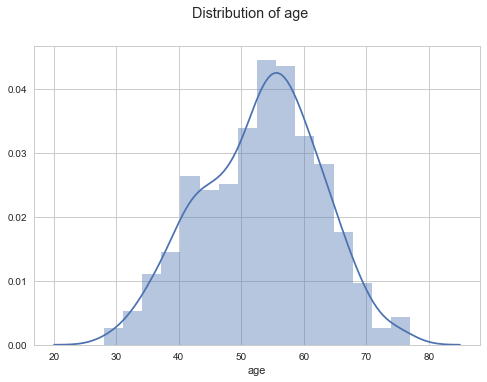

In [412]:
#sns distplot function combines matplotlib hist() function with sns kdeplot() function.
sns.distplot(df_clean['age'])
plt.suptitle('Distribution of age')

In [417]:
df_clean['max_heart_rate'].describe()

count    741.000000
mean     138.740891
std       25.828809
min       60.000000
25%      120.000000
50%      140.000000
75%      159.000000
max      202.000000
Name: max_heart_rate, dtype: float64

//anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


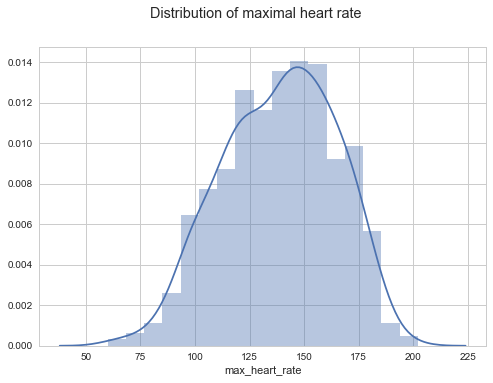

In [420]:
sns.distplot(df_clean['max_heart_rate'])
plt.suptitle('Distribution of maximal heart rate')

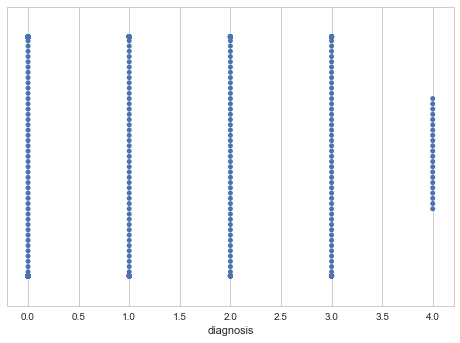

In [433]:
sns.swarmplot('diagnosis', data=df_clean)

# rules for visualizing two variables (recap). 
Their order does not matter here, hence Q-C and C-Q use the same visualization rule

C-Q: bivariate bar graph with sns factorplot, categories on x axis, and mean of response variable on y axis
Q-Q: scatterplot with sns regplot
C-C: you can plot them one a time. problem with a bivariate graph is that mean has no meaning in context of a 
categorical variable

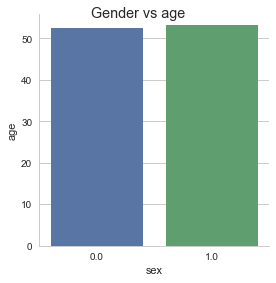

In [611]:
#kind = bar asks for a bar graph and ci=None suppresses error bars
sns.factorplot(x='sex', y='age', kind='bar', data=df_clean, ci=None)
plt.suptitle('Gender vs age')

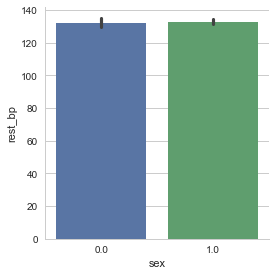

In [612]:
#categorical explanatory variable 'sex' and quantitative response variable 'rest_bp'
sns.factorplot(x='sex', y='rest_bp', data=df_clean, kind='bar')

In [423]:
df_clean['chest_pain'].dtype

category

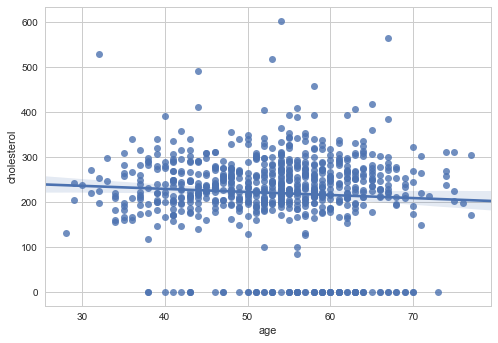

In [613]:
#We use a regplot to plot two quantitative variables, age and cholesterol, while also having a regression line suggesting
#any association present
#we always plot the explanatory variable on the x axis, and the response variable on the y axis
sns.regplot(x='age', y='cholesterol', data=df_clean)

In [614]:
#We see that several observations have a cholesterol of "0". This will need to be investigated subsequently and treated
#as missing values

In [444]:
#how can we gain a better idea of how two categorical variables interact?
df_clean.groupby('sex')['diagnosis'].value_counts()/len(df)

sex  diagnosis
0.0  0            0.142391
     1            0.028261
     3            0.008696
     2            0.007609
     4            0.002174
1.0  0            0.245652
     1            0.194565
     2            0.078261
     3            0.076087
     4            0.021739
Name: diagnosis, dtype: float64

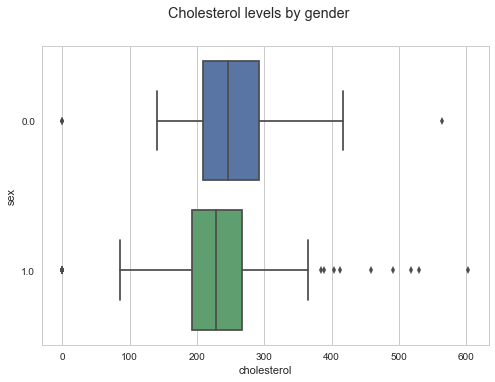

In [615]:
#common statistical boxplot visualization
sns.boxplot(x='cholesterol', y = 'sex', data=df_clean)
plt.suptitle('Cholesterol levels by gender')

In [617]:
#describing the dataset/the variables of the dataset, after we group the values in the dataset by diagnostic category
#the describe function gives us the key statistics for each quantitative variable in the dataset
df_clean.groupby('diagnosis').describe()

age  cholesterol  max_heart_rate     rest_bp  \
diagnosis                                                              
0         count  357.000000   357.000000      357.000000  357.000000   
          mean    50.302521   233.336134      149.291317  129.871148   
          std      9.417789    66.596253       23.643876   16.566861   
          min     28.000000     0.000000       69.000000   94.000000   
          25%     43.000000   202.000000      135.000000  120.000000   
          50%     51.000000   230.000000      152.000000  130.000000   
          75%     57.000000   269.000000      168.000000  140.000000   
          max     76.000000   564.000000      202.000000  190.000000   
1         count  205.000000   205.000000      205.000000  205.000000   
          mean    52.946341   229.443902      131.541463  134.502439   
          std      8.577333   101.127628       23.681806   19.045514   
          min     31.000000     0.000000       82.000000   92.000000   
          25%     47.000000   203.000000      115.000000  120.000000   
          50%     54.000000   243.000000      130.000000  130.000000   
          75%     59.000000   279.000000      150.000000  145.000000   
          max     75.000000   603.000000      195.000000  200.000000   
2         count   79.000000    79.000000       79.000000   79.000000   
          mean    58.430380   182.607595      127.797468  135.392405   
          std      7.041422   122.971168       22.807095   15.723099   
          min     42.000000     0.000000       60.000000  100.000000   
          25%     55.000000     0.000000      112.500000  124.000000   
          50%     59.000000   219.000000      130.000000  134.000000   
          75%     63.000000   261.500000      144.000000  144.500000   
          max     74.000000   409.000000      180.000000  180.000000   
3         count   78.000000    78.000000       78.000000   78.000000   
          mean    59.179487   178.205128      122.769231  136.102564   
          std      7.870285   116.047165       24.381664   24.938673   
          min     39.000000     0.000000       63.000000    0.000000   
          25%     54.000000     0.000000      105.750000  122.250000   
          50%     60.000000   219.500000      120.000000  135.000000   
          75%     64.000000   267.750000      140.000000  150.000000   
          max     77.000000   353.000000      173.000000  200.000000   
4         count   22.000000    22.000000       22.000000   22.000000   
          mean    59.227273   206.045455      130.545455  142.227273   
          std      8.286143   112.888684       24.595252   21.080191   
          min     38.000000     0.000000       84.000000  112.000000   
          25%     56.250000   174.750000      116.250000  126.250000   
          50%     60.500000   230.500000      130.000000  141.500000   
          75%     63.750000   283.500000      145.000000  157.500000   
          max     77.000000   407.000000      182.000000  190.000000   

                 st_depression  
diagnosis                       
0         count     357.000000  
          mean        0.425210  
          std         0.712199  
          min        -0.500000  
          25%         0.000000  
          50%         0.000000  
          75%         0.800000  
          max         4.200000  
1         count     205.000000  
          mean        1.088293  
          std         1.021369  
          min         0.000000  
          25%         0.000000  
          50%         1.000000  
          75%         2.000000  
          max         5.000000  
2         count      79.000000  
          mean        1.394937  
          std         1.204787  
          min        -1.000000  
          25%         0.000000  
          50%         1.400000  
          75%         2.100000  
          max         4.000000  
3         count      78.000000  
          mean        1.598718  
          std         1.352006  
          min         0.000000  
         

In [279]:
#before starting to manipulate the dataset itself, we make a copy, and will work on the copy rather than the original
df_clean_copy = df_clean.copy()

# Now we can move to inferential statistics

We call them inferential statistics because we try to infer the population's paramters from our sample

The process is always the same and involves hypothesis testing:
1. define null hypothesis and alternate hypothesis
2. analyze evidence
3. interpret results

Typical H0: there is no relationship between the explanatory and response variable
Typical H1: there is a statistically significant relationship

Bivariate statistical tools:
Three main tools: ANOVA; chi-square; correlation coefficient

Type 1 vs Type 2 errors
Type 1 error: the incorrect rejection of a true null hypothesis
Type 2 error: retaining a false null hypothesis

we will test the null hypothesis that age and diagnosis are not related.
the type of variables we have (explanatory/response and categorical/quantitative for each) determines the type of 
statistical tools we will use:

Explanatory categorical and response quantitative: ANOVA
Explanatory categorical and response categorical: Chi Square test
Explanatory quantitative and response categorical: classify/bin explanatory variable and use chi square test
Explanatory quantitative and response quantitative: pearson correlation

a result is statistically significant if it is unlikely to be the result of chance

before performing these analyses, one needs to use the .dropna() function to include only valid data

In [207]:
#Going the wrong way?
#In regression analysis you can change your predictor and response variables. This is because they may be correlated,
#in which case X is correlated to Y and by definition Y is correlated with X. There is no directionality implied, which
#is also why you cannot talk of causation, but only of correlation.
test1 = smf.ols(formula = 'age ~ C(diagnosis)', data = df_clean_copy).fit()
print(test1.summary())

#*Whenever we have an explanatory categorical variable with more than two levels, we need to explicitly state this for
#statsmodels. Here we state it by adding 'C'and the variable name in parentheses. By definition, statsmodels then
#converts the first level of the variable into the reference group, therefore showing only n-1 levels in the results.
#each level is in brief a comparison to the reference group. Here the reference group becomes a diagnosis of 0.

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     28.42
Date:                Fri, 23 Jun 2017   Prob (F-statistic):           5.56e-22
Time:                        18:09:46   Log-Likelihood:                -2658.2
No. Observations:                 741   AIC:                             5326.
Df Residuals:                     736   BIC:                             5350.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            50.3025      0.46

What interests us in an ANOVA table are:
R squared
The F statistic
The p value (here called 'Prob (F-statistic)
The coefficients of each explanatory variable and the associated p value for it (here 'coef' and 'P>|t| columns)
The 95% confidence interval for our coefficients. Here called '[95.0% Conf. Int.]

The 'R Squared' statistic. This is a measure of how much of the variability in the response variable, age here, is 
explained by our model. We see this here it is 0.134 only. So diagnostic group only helps us explain 13.4% of the 
variability in age. This can indicate that either we omit important explanatory variables that we can add to the model, or that we miss the structure of the association.

The F statistic:
An F test is any statistical test in which the test statistic has an F distribution under the null hypothesis
The F statistic = variation among sample means/variation within sample groups
ANOVA F Test = are the differences among the sample means due to true differences among the population means, 
or merely due to sampling variability?

p value in an ANOVA table = probability of getting an F value as large or larger if H0 is true
probability of finding this value if there is no difference between sample means.
I would like to thank M.N. for sending me the below blog, which contains a couple of great posts on common statistical concepts:

http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-correctly-interpret-p-values


In an ANOVA table, we can decide if the relationship is statistically significant by checking the value of the F
statistic against the relevant statistical table, F=28.42 above, or by looking at the p value. The latter is easiest.
A long tradition in statistics is to consider a p value (also called alpha) below 0.05 as indicative of a significant
relationship. When conducting such tests, you need to decide what p value/alpha value you feel comfortable with, and from then onwards you create  a binary framework: either a statistic has an associated p value below the value you decided on at the beginning, or not. In this sense, a p value of 0.0001 is not indicative of a 5 times stronger relationship than a p value of 0.0005. 
In our case here a p value of 5.56e-22 means the relationship is statistically significant (5.56e-22 < 0.05).

The coefficients for each variable. Here for example our model would be:
age = 50.3025 + 2.6438*diagnosis1 + 8.1279* diagnosis2 + 8.8770 * diagnosis3 + 8.9248 * diagnosis4
We can also say that being having a diagnosis of 1 increases someone's age by 2.6438 assuming we hold all other
explanatory variables in our model constant at 0.
a negative but significant coefficient indicates that our explanatory variable and the respons variable are negatively
associated: as one increases, the other decreases.
the higher the coefficient, the more impact it will have on the value of our response variable based on our model.
However, these coefficients result from our sample, meaning that the population parameters may differ from these.
The confidence intervals give us a range in which these parameters can be for the population, with 95% confidence.
For example we can be 95% confident that the population parameter for diagnosis1 is between 1.134 and 4.153.

Whenever the explanatory variable has more than 2 levels, we need to also perform post hoc statistical tests to 
better understand the relationship between the explanatory variable and the response variable
we know the groups tested are different overall, but not exactly where/how they are different
for explanatory variables with multiples levels, F test and p value do not tell us why the group means are not equal, 
or how. there are many ways in which this can be the case.

How are the response and explanatory variables associated per level of the explanatory variable?

post hoc tests aim to protect against type 1 error when explanatory variable is multilevel

In [209]:
#now we examine the means and standard deviations
grouped1_mean = df_clean_copy.groupby('diagnosis').mean()['age']
print(grouped1_mean)

diagnosis
0    50.302521
1    52.946341
2    58.430380
3    59.179487
4    59.227273
Name: age, dtype: float64


In [210]:
grouped1_std = df_clean_copy.groupby('diagnosis').std()['age']
print(grouped1_std)

diagnosis
0    9.417789
1    8.577333
2    7.041422
3    7.870285
4    8.286143
Name: age, dtype: float64


In [211]:
#given that we have an explanatory categorical variable with multiple levels, we use the 
#tuckey hsd test
#other tests:
#Holm T
#Least Significant Difference

tuckey1 = multi.MultiComparison(df_clean_copy['age'], df_clean_copy['diagnosis'])
res1 = tuckey1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     2.6438   0.5412  4.7464  True 
  0      2     8.1279   5.1446 11.1111  True 
  0      3     8.877    5.8781 11.8758  True 
  0      4     8.9248   3.654  14.1955  True 
  1      2     5.484    2.3067  8.6614  True 
  1      3     6.2331   3.0411  9.4252  True 
  1      4     6.2809   0.898  11.6639  True 
  2      3     0.7491  -3.0808  4.579  False 
  2      4     0.7969  -4.9872  6.5809 False 
  3      4     0.0478  -5.7443  5.8399 False 
---------------------------------------------


We will now test another hypothesis:  
Hypothesis(0)(a): the presence of chest pain and the diagnosis (0 or 1) are independent  
Alternative Hypothesis 1: presence of chest pain and diagnosis are not independent

# Feature engineering

Paradox: you can get better results with great feature engineering and a poor model than with poor feature engineering
but a great model
> A feature is an attribute that is useful to your problem  
Dr. Jason Brownlee
> "The algorithms we used are very standard for Kagglers...We spent most of our efforts in feature engineering.  
Xavier Conort, #1 Kaggler in 2013

Aims to convert data attributes into data features

Aims to optimize data modelling

Requires understanding of the dataset and research problem, and understanding of model you plan on using can be 
domain driven, or data driven
i.e. for SVM with linear kernel you need to manually construct nonlinear interactions between features and feed them 
as input to your SVM model. An SVM with polynomial kernel will naturally capture them.
other example: SVMs are very sensitive to dimensions of features, while DT/RFs are not
With tabular data you combine, aggregate, split and/or decompose features in order to create new ones
Given an output y and a feature x, you can try the following transforms first:
e^x, log(x), x^2, x^3
an indicator of the usefulness of the transformation is if the correlation between y and x'
is higher than the correlation between y and x
best way to validate this is to check your model error with or without the transformed feature
http://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/
http://trevorstephens.com/kaggle-titanic-tutorial/r-part-4-feature-engineering/

In [6]:
diagnosis_dic = {0:0, 1:1, 2:1, 3:1, 4:1}
df_clean_copy['diagnosis_binary'] = df_clean_copy['diagnosis'].map(diagnosis_dic)

NameError: name 'df_clean_copy' is not defined

In [474]:
df_clean_copy['diagnosis_binary'].value_counts()

1    384
0    357
Name: diagnosis_binary, dtype: int64

In [222]:
#contingency table of observed counts
#the crosstab function allows us to cross one variable with another
#when creating contingency tables, we put the response variable first (therefore vertical in table), 
#and the explanatory variable second, therefore horizontal at the top of the table.
ct1 = pd.crosstab(df_clean_copy['diagnosis_binary'], df_clean_copy['chest_pain'])
print(ct1)

chest_pain        1.0  2.0  3.0  4.0
diagnosis_binary                    
0                  23  128  112   94
1                  15   22   49  298


In [223]:
#column percentages
colsum = ct1.sum(axis=0)
colpct = ct1/colsum
print(colpct)

chest_pain             1.0       2.0       3.0       4.0
diagnosis_binary                                        
0                 0.605263  0.853333  0.695652  0.239796
1                 0.394737  0.146667  0.304348  0.760204


In [224]:
#chi square test
#Expected counts: p assuming events are independent. p(1) * p(2) | column total*row total/table total
#Chi square statistic summarizes this. difference between our obersavtion and what we would expect if H0 is true
#We rely on the p value, as different distributions define whether the chi square itself is large or not

print('chi-square value, p value, expected counts')
cs1 = scipy.stats.chi2_contingency(ct1)
print(cs1)

chi-square value, p value, expected counts
(206.69693667917477, 1.5066891002705367e-44, 3, array([[  18.30769231,   72.26720648,   77.56680162,  188.8582996 ],
       [  19.69230769,   77.73279352,   83.43319838,  203.1417004 ]]))


In [526]:
#Explanatory variable with multiple levels!
#we would have to do a pairwise comparison between every two groups of the explanatory
#variable, vs the response variable
#This would be a Bonferroni adjustment - we adjust p value we use by number of pairwise comparisons, and test these.

In [225]:
df_clean_copy.columns

Index(['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs',
       'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression',
       'diagnosis', 'diagnosis_binary'],
      dtype='object')

In [226]:
ct2 = pd.crosstab(df_clean_copy['diagnosis_binary'], df_clean_copy['sex'])
print(ct2)

sex               0.0  1.0
diagnosis_binary          
0                 131  226
1                  43  341


In [227]:
#column percentages
colsum2 = ct2.sum(axis=0)
colpct2 = ct2/colsum2
print(colpct2)

sex                    0.0       1.0
diagnosis_binary                    
0                 0.752874  0.398589
1                 0.247126  0.601411


In [228]:
#chi square test
print('chi-square value, p value, expected counts')
cs2 = scipy.stats.chi2_contingency(ct2)
print(cs2)

chi-square value, p value, expected counts
(65.523823461676344, 5.741569147761909e-16, 1, array([[  83.82995951,  273.17004049],
       [  90.17004049,  293.82995951]]))


In [510]:
#Moderators
#a moderator is a third variable that affects the direction and/or strength between your explanatory and response variables
#the question is, is our response variable associated with our explanatory variable, for each level of our third variable?

In [240]:
#let's see if sex is a moderator in the statistically significant relationship between chest pain and diagnosis
df_clean_copy_men = df_clean_copy[df_clean_copy['sex'] == 0]
len(df_clean_copy_men)

174

In [241]:
df_clean_copy_women = df_clean_copy[df_clean_copy['sex'] == 1]
len(df_clean_copy_women)

567

In [242]:
#contingency table of observed counts
#when creating contingency tables, we put the response variable first (therefore vertical in table), 
#and the explanatory variable second, therefore horizontal at the top of the table.
ct3 = pd.crosstab(df_clean_copy_men['diagnosis_binary'], df_clean_copy_men['chest_pain'])
print(ct3)

chest_pain        1.0  2.0  3.0  4.0
diagnosis_binary                    
0                   9   47   44   31
1                   0    4    6   33


In [243]:
#column percentages
colsum = ct3.sum(axis=0)
colpct = ct3/colsum
print(colpct)

chest_pain        1.0       2.0   3.0       4.0
diagnosis_binary                               
0                 1.0  0.921569  0.88  0.484375
1                 0.0  0.078431  0.12  0.515625


In [244]:
#chi square test
print('chi-square value, p value, expected counts')
cs3 = scipy.stats.chi2_contingency(ct3)
print(cs3)

chi-square value, p value, expected counts
(39.896349270579876, 1.1207983387044401e-08, 3, array([[  6.77586207,  38.39655172,  37.64367816,  48.18390805],
       [  2.22413793,  12.60344828,  12.35632184,  15.81609195]]))


In [246]:
#contingency table of observed counts
#when creating contingency tables, we put the response variable first (therefore vertical in table), 
#and the explanatory variable second, therefore horizontal at the top of the table.
ct4 = pd.crosstab(df_clean_copy_women['diagnosis_binary'], df_clean_copy_women['chest_pain'])
print(ct4)

chest_pain        1.0  2.0  3.0  4.0
diagnosis_binary                    
0                  14   81   68   63
1                  15   18   43  265


In [247]:
#column percentages
colsum = ct4.sum(axis=0)
colpct = ct4/colsum
print(colpct)

chest_pain             1.0       2.0       3.0       4.0
diagnosis_binary                                        
0                 0.482759  0.818182  0.612613  0.192073
1                 0.517241  0.181818  0.387387  0.807927


In [248]:
#chi square test
print('chi-square value, p value, expected counts')
cs4 = scipy.stats.chi2_contingency(ct4)
print(cs4)

chi-square value, p value, expected counts
(153.13334878752136, 5.556477341199484e-33, 3, array([[  11.55908289,   39.46031746,   44.24338624,  130.7372134 ],
       [  17.44091711,   59.53968254,   66.75661376,  197.2627866 ]]))


In [535]:
df_clean_copy_women.groupby('chest_pain')['diagnosis'].value_counts()

chest_pain  diagnosis
1.0         0             14
            1              9
            2              3
            3              2
            4              1
2.0         0             81
            1             14
            2              2
            3              2
3.0         0             68
            1             22
            3             11
            2              8
            4              2
4.0         1            134
            0             63
            2             59
            3             55
            4             17
Name: diagnosis, dtype: int64

the relationship between chest pain and the diagnosis holds for both levels of the sex variables, hence it is not a 
moderator.  
we would test for moderator variables in the case of a quantitative response variable the same way:  
1. divide the population into the sublevels of the third variables
2. conduct an smf.ols test for each to see if the relationship is statistically significant for each level

identifying a confounding variable does not allow to establish causation, just to get closer to a causal connection.
due to infinite number of possible lurking variables, observational studies cannot rly establish causation
a lurking of confounding variable is a third variable that is associated with both the explanatory and response 
variables.
i.e. x=firefighters; y=damage caused by a fire. plot would suggest more firefighters causes more fire damage.
in reality there is a third confounding variable that influences both, seriousness of the fire.
In a study we want to demonstrate that our statistical relationship is valid even after controlling for confounders.

now we will test whether there is a relationship between two quantitative variables, age and cholesterol
for this we use the pearson correlation test
r, going from -1 to 1 only tells us whether the two variables are linearly related. they may be related in nonlinear ways
therefore it's always important to look at r in parallel with a scatterplot of the two variables
r squared is a measure of how much variability in one variable can be explained by the other variable
to calculate the pearson coefficient we need to remove all missing values
Please remember that when two variables are correlated it is possible that:
X causes Y or Y causes X
Z causes both X and Y
X and Y are correlated by chance - a spurious correlation

In [231]:
df_clean_copy.columns

Index(['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs',
       'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression',
       'diagnosis', 'diagnosis_binary'],
      dtype='object')

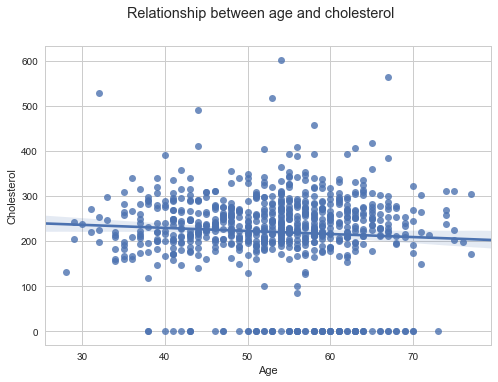

In [450]:
scat1 = sns.regplot(x='age', y = 'cholesterol', fit_reg=True, data = df_clean_copy)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.suptitle('Relationship between age and cholesterol')
scat1

In [630]:
#the r coefficient is a measure of association, of how closely points are clustered around a line
#correlations are always between -1 and 1
#r measures solely linear association
#association, not causation
#it is a number without units
#it can mislead in presence of outliers or non linear association -> always draw a scatter plot as well and check visually
#when you look at a scatter plot you look at direction form and strength of relationship
#if you identify a nonlinear association, with one or more curves, then you know you ought to add nonlinear explanatory
#variables to your regression model, to aim to capture this nonlinear association as well.
#ecological correlations based on averages can be misleading and overstate strength of associations for individual 
#units
print('association between age and cholesterol')
print(scipy.stats.pearsonr(df_clean_copy['age'], df_clean_copy['cholesterol']))

association between age and cholesterol
(-0.068169552180946086, 0.063640508704807752)


# Linear regression:

multivariate linear regression for quantitative response variable
logistic regression for binary categorical response variable

Assumptions of these types of models:

Normality: residuals from our linear regression model are normally distributed. if they are not,
our model may be misspecified

Linearity: association between explanatory and response variable is linear

Homoscedasticity (or assumption of constant variance): variability in the response variable is the same at all levels
of the explanatory variable. i.e. if residuals are spread around the regression line in a 
similar manner as you move along the x axis (values of the explanatory variable)

Independence: observations are not correlated with each other. Longitudinal data can violate this assumption, as well 
as hierarchical nesting/clustering data i.e. looking at students by classes. this assumption is the most serious
to be violated, and also cannot be fixed by modifying the variables. the data structure itself is the problem.

We have to contend with:

Multicollinearity: explanatory variables are highly correlated with each other. this can mess up your parameter 
estimates or make them highly unstable. Signs: 
1. highly associated variable not significant. 
2. negative regression 
coefficient that should be positive 
3. taking out an explanatory variable drastically changes the results

Outliers: can affect your regression line

multiple regression model allows us to find the relationship between one explanatory variable and the 
reponse variable, while controlling (holding constant at 0) all the other variables.
for interpretability of our model, each variable needs to include a meaningful value of 0, so as to make it easier 
to interpret the coefficients (what does it mean to hold cholesterol constant at 0 if its range has no value of 0?)
for a categorical variable, we can just recode one of the values to be 0
for a quantitative variable, we have to center it. Centering = subtracting the mean of a variable from the value 
of the variable. We are therefore recoding it so that its mean=0.
if a quantitative explanatory variable includes a meaningful value of 0 already, we may not need to center it.
in linear regression we only center explanatory variables not response one
in logistic regression we always need to code response binary variable so that 0 means no outcome and 1 outcome occurred
this is true whether outcome is positive or negative.

We will create a multiple regression model, investigating the relationship between our explanatory variables and 
our response variable diagnosis
we will first center the explanatory variables. for categorical variables, one of the categories needs to be 0, for 
quantitative variables, we need to subtract the mean from each value.

Notes: 
do not center the response variable.
is using logistic regression, do recode the binary response variable to make sure one class is coded as 0

In [262]:
df_clean_copy.columns

Index(['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs',
       'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression',
       'diagnosis', 'diagnosis_binary'],
      dtype='object')

In [270]:
#categorical variables: sex, chest_pain, fasting_bs, rest_ecg, exercise_angina
#quantitative variables: age, rest_bp, cholesterol, max_heart_rate, st_depression

In [280]:
df_clean_copy['chest_pain'].value_counts()

4.0    392
3.0    161
2.0    150
1.0     38
Name: chest_pain, dtype: int64

In [281]:
recode_chest_pain = {1:0, 2:1, 3:2, 4:3}
df_clean_copy['chest_pain_p'] = df_clean_copy['chest_pain'].map(recode_chest_pain)

In [282]:
df['fasting_bs'].value_counts()

0.0    692
1.0    138
Name: fasting_bs, dtype: int64

In [283]:
df['rest_ecg'].value_counts()

0.0    551
2.0    188
1.0    179
Name: rest_ecg, dtype: int64

In [284]:
df['exercise_angina'].value_counts()

0.0    528
1.0    337
Name: exercise_angina, dtype: int64

In [285]:
df_clean_copy['age_c'] = df_clean_copy['age'] - df_clean_copy['age'].mean()

In [286]:
df_clean_copy['rest_bp_c'] = df_clean_copy['rest_bp'] - df_clean_copy['rest_bp'].mean()

In [287]:
df_clean_copy['cholesterol_c'] = df_clean_copy['cholesterol'] - df_clean_copy['cholesterol'].mean()

In [288]:
df_clean_copy['max_heart_rate_c'] = df_clean_copy['max_heart_rate'] - df_clean_copy['max_heart_rate'].mean()

In [289]:
df_clean_copy['st_depression_c'] = df_clean_copy['st_depression'] - df_clean_copy['st_depression'].mean()

In [292]:
df_clean_copy.columns

Index(['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs',
       'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression',
       'diagnosis', 'chest_pain_p', 'age_c', 'rest_bp_c', 'cholesterol_c',
       'max_heart_rate_c', 'st_depression_c', 'diagnosis_binary'],
      dtype='object')

In [295]:
df_clean_copy_c = df_clean_copy[['age_c', 'sex', 'chest_pain_p', 'rest_bp_c', 'cholesterol_c',
                                       'fasting_bs', 'rest_ecg', 'max_heart_rate_c', 'exercise_angina',
                                       'st_depression_c', 'diagnosis_binary']]

In [296]:
df_clean_copy_c.columns

Index(['age_c', 'sex', 'chest_pain_p', 'rest_bp_c', 'cholesterol_c',
       'fasting_bs', 'rest_ecg', 'max_heart_rate_c', 'exercise_angina',
       'st_depression_c', 'diagnosis_binary'],
      dtype='object')

In [459]:
model1 = smf.ols(formula = 'age_c ~ sex', data = df_clean_copy_c).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  age_c   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8054
Date:                Tue, 27 Jun 2017   Prob (F-statistic):              0.370
Time:                        19:31:51   Log-Likelihood:                -2711.1
No. Observations:                 741   AIC:                             5426.
Df Residuals:                     739   BIC:                             5435.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.5596      0.713     -0.785      0.4

We now add explanatory variables to our model one at a time. In doing this, we keep an eye on what impact adding an
explanatory variable will have on our model. Sometimes for example we add a variable, and another variable that was
statistically significant (had a p value below 0.05), suddenly becomes insignificant. This means the new variable
is a confounder, a moderator, variable in the relationship between that other variable and the response variable.

In [461]:
model2 = smf.ols(formula = 'age_c ~ sex + cholesterol_c', data=df_clean_copy_c).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  age_c   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.889
Date:                Tue, 27 Jun 2017   Prob (F-statistic):              0.152
Time:                        19:32:53   Log-Likelihood:                -2709.6
No. Observations:                 741   AIC:                             5425.
Df Residuals:                     738   BIC:                             5439.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        -0.3644      0.721     -0.506

In [635]:
#here we will skip a couple of steps and create the overall model with all variables.

In [471]:
model3 = smf.ols(formula = 'age_c ~ sex + C(chest_pain_p) + (rest_bp_c) + cholesterol_c + fasting_bs + C(rest_ecg) + \
                            max_heart_rate_c + exercise_angina + st_depression_c + diagnosis_binary', data = df_clean_copy_c).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  age_c   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     21.58
Date:                Tue, 27 Jun 2017   Prob (F-statistic):           1.25e-43
Time:                        20:35:33   Log-Likelihood:                -2590.6
No. Observations:                 741   AIC:                             5209.
Df Residuals:                     727   BIC:                             5274.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 -0

We identified some explanatory variables that are associated with age, but our model overall barely explains 27%
of the variation in the response variable
let's run some diagnostics

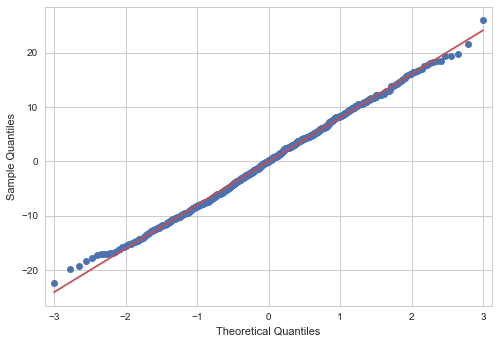

In [466]:
#Q-Q plot for normality
fig1 = sm.qqplot(model3.resid, line='r')
#red line represents residuals we would expect if model residuals were normally distributed
#our residuals below deviate somewhat from red line, especially at lower and higher quantiles, meaning they do not
#follow a normal distribution. This means the curvilinear association in our model is not fully explained by our model.
#We could add more explanatory variables in this case to try to better explain any curvilinear association.

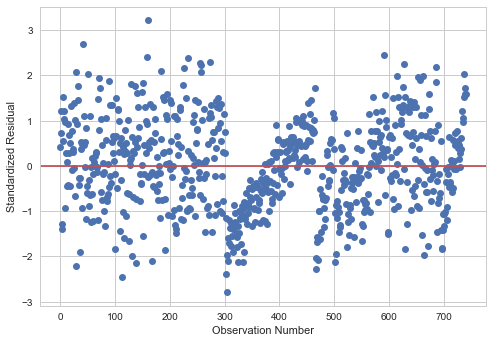

In [632]:
#simple plot of residuals
stdres = pd.DataFrame(model3.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
#resid_pearson normalizes our model's residuals
#ls='none' means points will not be connected

#we expect most residuals to fall within 2sd of the mean. More than 2 indicate there are outliers, and more than 3 
#extreme outliers.
#if more than 1% of our observations have standardized residuals with an absolute value greater than 2.5, or more than 5%
#have one greater than or equal to 2, there is evidence that the fit of the model is poor. top cause of this is 
#ommission of important explanatory variables in our model.

#standardized residuals in linear regression will always be linear, and the line will be horizontal

#normalizing or standardizing residuals amounts to making them have a mean of 0 and sd of 1 so as to fit a normal 
#standard distribution

#if residuals show a strong pattern (up, down, polynomial) then it is a good indication of nonlinearity
#in the underlying relationship

Figure(576x396)


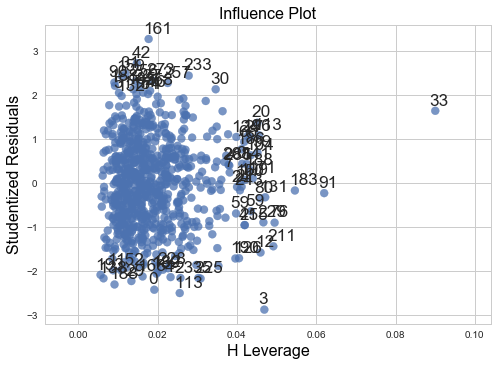

In [469]:
#leverage plot
fig4 = sm.graphics.influence_plot(model3, size=8)
print(fig4)

#leverage, always between 0 and 1. At 0, a standardized residual has no influence on our model.
#leverage is a measure of how much influence a specific residual (and therefore observation) has on our model.
#we see that we have extreme outliers, but they are low leverage, meaning they do not have an undue influence on our
#estimation of the regression model.
#we have an observation that is both high leverage and and outlier, observation 33. We would need to further investigate
#the corresponding observation.

In [470]:
#now let's focus on our actual response variable in the study
#since it is a binary variable, we will need to use a logistic regression model

In [298]:
lreg1 = smf.logit(formula = 'diagnosis_binary ~ C(chest_pain_p)', data = df_clean_copy_c).fit()
print(lreg1.summary())

Optimization terminated successfully.
         Current function value: 0.543711
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       diagnosis_binary   No. Observations:                  741
Model:                          Logit   Df Residuals:                      737
Method:                           MLE   Df Model:                            3
Date:                Sat, 24 Jun 2017   Pseudo R-squ.:                  0.2148
Time:                        13:48:58   Log-Likelihood:                -402.89
converged:                       True   LL-Null:                       -513.13
                                        LLR p-value:                 1.581e-47
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               -0.4274      0.332     -1.288      0.198        -1.078     0.223

In [454]:
#again, normally we would add variables one at a time, but here we will go faster.
lreg2 = smf.logit(formula = 'diagnosis_binary ~ age_c + sex + C(chest_pain_p) + cholesterol_c', data = df_clean_copy_c).fit()
print(lreg2.summary())

Optimization terminated successfully.
         Current function value: 0.488979
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       diagnosis_binary   No. Observations:                  741
Model:                          Logit   Df Residuals:                      734
Method:                           MLE   Df Model:                            6
Date:                Tue, 27 Jun 2017   Pseudo R-squ.:                  0.2939
Time:                        19:24:14   Log-Likelihood:                -362.33
converged:                       True   LL-Null:                       -513.13
                                        LLR p-value:                 3.728e-62
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               -1.6537      0.408     -4.058      0.000        -2.452    -0.855

In [472]:
lreg3 = smf.logit(formula = 'diagnosis_binary ~ age_c + sex + C(chest_pain_p) + rest_bp_c + \
                  cholesterol_c + fasting_bs + C(rest_ecg) + max_heart_rate_c + \
                  exercise_angina + st_depression_c', data = df_clean_copy_c).fit()
print(lreg3.summary())

Optimization terminated successfully.
         Current function value: 0.421593
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       diagnosis_binary   No. Observations:                  741
Model:                          Logit   Df Residuals:                      727
Method:                           MLE   Df Model:                           13
Date:                Tue, 27 Jun 2017   Pseudo R-squ.:                  0.3912
Time:                        20:35:53   Log-Likelihood:                -312.40
converged:                       True   LL-Null:                       -513.13
                                        LLR p-value:                 1.100e-77
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 -1.9267      0.465     -4.139      0.000        -2.839    

In [302]:
#however, for logistic regression it makes much more sense to calculate the odds ratio
#this is because in binary logistic regression, we only deal with probabilities, of an outcome (response variable) 
#being 0 or 1.
#odds are calculated as the exponentiation of our coefficients as calculated in a normal ANOVA table.

#Odds ratio (OR) for an explanatory variable:
#if OR=1, there is no association meaningful association between explanatory and response variables
#if OR<1, the response variable becomes less likely as the explanatory one increases
#if OR>1, the response variable becomes more likely as the explanatory one increases
print('Odds Ratios')
print(np.exp(lreg3.params))
#Interpretation of OR
#Here we would say that based on our sample, women were 3.7 times more likely than men to have a diagnosis of 1.

Odds Ratios
Intercept                    0.145625
C(sex)[T.1.0]                3.706415
C(chest_pain_p)[T.1]         0.573894
C(chest_pain_p)[T.2]         0.868495
C(chest_pain_p)[T.3]         3.672428
C(fasting_bs)[T.1.0]         1.662336
C(rest_ecg)[T.1.0]           0.916029
C(rest_ecg)[T.2.0]           1.263268
C(exercise_angina)[T.1.0]    2.732984
age_c                        1.021933
rest_bp_c                    1.006246
cholesterol_c                0.998173
max_heart_rate_c             0.985909
st_depression_c              1.851057
dtype: float64


In [303]:
# odd ratios with 95% confidence intervals
params = lreg3.params
conf = lreg3.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (np.exp(conf))
#we have 95% confidence that the sex odds ratio will be between 2.24 and 6.12 for the population.

                           Lower CI  Upper CI        OR
Intercept                  0.058480  0.362629  0.145625
C(sex)[T.1.0]              2.242497  6.125988  3.706415
C(chest_pain_p)[T.1]       0.224975  1.463965  0.573894
C(chest_pain_p)[T.2]       0.364589  2.068857  0.868495
C(chest_pain_p)[T.3]       1.580165  8.535010  3.672428
C(fasting_bs)[T.1.0]       0.938503  2.944433  1.662336
C(rest_ecg)[T.1.0]         0.506524  1.656603  0.916029
C(rest_ecg)[T.2.0]         0.769914  2.072760  1.263268
C(exercise_angina)[T.1.0]  1.737951  4.297705  2.732984
age_c                      0.997020  1.047468  1.021933
rest_bp_c                  0.995035  1.017583  1.006246
cholesterol_c              0.995907  1.000445  0.998173
max_heart_rate_c           0.977157  0.994740  0.985909
st_depression_c            1.480481  2.314391  1.851057


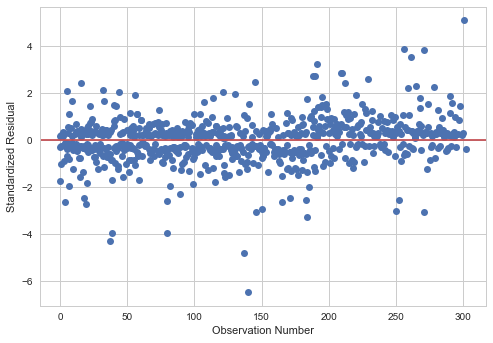

In [305]:
#statsmodels offers significantly less residuals analysis options for logistic regression compared to linear one
#yet there is no reason we cannot get information by studying the residuals
#simple plot of residuals
stdres = pd.DataFrame(lreg3.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
#resid_pearson normalizes our model's residuals
#ls='none' means points will not be connected
#we expect most residuals to fall within 2sd of the mean. More than 2 are outliers, and more than 3 extreme outliers.
#if more than 1% of our observations have standardized residuals with an absolute value greater than 2.5, or more than 5%
#have one greater than or equal to 2, there is evidence that the fit of the model is poor. largest cause of this is ommission
#of important explanatory variables in our model.
#standardized residuals in linear regression will always be linear, and the line will be horizontal
#if residuals show a strong pattern (up, down, polynomial) then it is a good indication of nonlinearity
#in the underlying relationship

In [673]:
#Statsmodels and scikit learn still offer few and poor 'off the shelf' options for imputing missing values in more
#statistically sound ways.
#As of statsmodels 0.8.0 at least, statsmodels offers the MICE imputation function
#a description is available here: http://www.statsmodels.org/dev/imputation.html
#and the details behind the implementation are here: 
#http://www.statsmodels.org/dev/_modules/statsmodels/imputation/mice.html
#to be able to use MICE you will need to update the statsmodels coming with Anaconda, to 0.8.0
#I am yet to find nice tutorials/examples of the mice function
#Let's create here a dataset with some missing values for one of our variables
df_clean_mice = df_red[df_red['rest_bp'].notnull() & df_red['cholesterol'].notnull() & df_red['fasting_bs'].notnull() & \
                  df['max_heart_rate'].notnull() & df['exercise_angina'].notnull()]

In [674]:
df_clean_mice.isnull().any()

age                False
sex                False
chest_pain         False
rest_bp            False
cholesterol        False
fasting_bs         False
rest_ecg           False
max_heart_rate     False
exercise_angina    False
st_depression       True
diagnosis          False
dtype: bool

In [497]:
df_clean_mice.describe()

,age,rest_bp,cholesterol,max_heart_rate,st_depression
count,745.000000,745.000000,745.000000,745.000000,741.000000
mean,53.130201,132.771812,219.923490,138.817450,0.893117
std,9.392743,18.599746,93.713004,25.825905,1.086922
min,28.000000,0.000000,0.000000,60.000000,-1.000000
25%,46.000000,120.000000,197.000000,120.000000,0.000000
50%,54.000000,130.000000,231.000000,140.000000,0.500000
75%,60.000000,140.000000,271.000000,160.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [694]:
#we create a dataframe with only quantitative variables
df_clean_mice = df_clean_mice[['age', 'rest_bp', 'cholesterol', 'max_heart_rate', 'st_depression']]

In [695]:
import statsmodels.imputation.mice as mice
import statsmodels
from statsmodels.base.model import LikelihoodModelResults
from statsmodels.regression.linear_model import OLS
from collections import defaultdict
#we wrap our dataframe in a MICEData object
imp = mice.MICEData(df_clean_mice)
#we specify our analysis model
formula_mice = 'diagnosis_binary ~ age + rest_bp + cholesterol + max_heart_rate + st_depression_c'
#We now take the MICEData object, and the formula specification and run both the imputation and the analysis
mice = mice.MICE(formula_mice, smf.logit, imp)
#various plots and summary statistics are available and/or being developed with the MICE package.

# Machine learning for data exploration

For me machine learning is simply the branch of statistics that has traditionally focused on working with large, 
heterogenous datasets, characterized by numerous variables that interact in nonlinear ways.
It is a collection of tools, just like statistics in general.

An amazing article on traditional parametric statistics vs machine learning is:
"Statistical Modeling: The Two Cultures," Leo Breiman, 2001.

Machine learning can be used for:
1. regression
2. classification
3. feature engineering and/or selection

Accuracy = test error rate. The rate at which an algorithm correctly classifies or estimates.
Goal is to minimize test error rate.
(in linear regression, which we saw before, accuracy was the mean squared error)
(in logistic regression: accuracy = how well the model classifies observations)

Supervised vs unsupervised learning
In supervised learning we work with labeled data
In unsupervised learning we aim to find patterns in unlabeled data

In machine learning we will regularly face the bias-variance trade off:
Variance = change in parameter estimates across different data sets
Bias = how far off model estimated values are from true values
ideally we want low variance and low bias, but they are negatively associated. As one decreases, the other increases.
Generally, as complexity of model increases, this leads to higher variance and lower bias
Simple models will have lower variance, but also be more biased.

We will briefly apply three machine learning algorithms here, which we could use in our exploratory data analysis:

Decision trees
Random forests
Support vector machines

I intend to expand this section in the future. It is difficult today to not take advantage of some of the
machine learning tools available, including when it comes to data exploration
We often forget that some key applications of machine learning tools are to help us gain insights faster than with
more manual methods, and in feature engineering and/or selection

In the data exploration phase, you would use very raw, off the shelf, machine learning algorithms, simply for 
exploratory/descriptive purposes

Decision trees

Note: decision trees cannot handle missing data!

In [553]:
df_clean_copy.columns

Index(['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs',
       'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression',
       'diagnosis', 'chest_pain_p', 'age_c', 'rest_bp_c', 'cholesterol_c',
       'max_heart_rate_c', 'st_depression_c', 'diagnosis_binary'],
      dtype='object')

In [566]:
#although decision trees and random forests are particularly suitable for dealing with categorical variables, and in
#many statistical packages we can input the categorical variables directly, because of how they are implemented in
#scikit learn, in this package we cannot input categorical variables directly. We first have to encode them in a 
#process called one hot encoding. This creates a separate column (variable) for each value of our explanatory
#categorical variable. For this we use pandas' get_dummies function

df_sex = pd.get_dummies(df_clean_copy['sex'], prefix = 'sex')

In [569]:
df_chest_pain = pd.get_dummies(df_clean_copy['chest_pain'], prefix = 'chest_pain')
df_fasting_bs = pd.get_dummies(df_clean_copy['fasting_bs'], prefix = 'fasting_bs')
df_rest_ecg = pd.get_dummies(df_clean_copy['rest_ecg'], prefix = 'rest_ecg')
df_exercise_angina = pd.get_dummies(df_clean_copy['exercise_angina'], prefix='exercise_angina')

In [570]:
df_merged = pd.concat([df_clean_copy, df_sex, df_chest_pain, df_fasting_bs, df_rest_ecg, df_exercise_angina], axis=1)

In [571]:
df_merged.columns

Index(['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs',
       'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression',
       'diagnosis', 'chest_pain_p', 'age_c', 'rest_bp_c', 'cholesterol_c',
       'max_heart_rate_c', 'st_depression_c', 'diagnosis_binary', 'sex_0.0',
       'sex_1.0', 'chest_pain_1.0', 'chest_pain_2.0', 'chest_pain_3.0',
       'chest_pain_4.0', 'fasting_bs_0.0', 'fasting_bs_1.0', 'rest_ecg_0.0',
       'rest_ecg_1.0', 'rest_ecg_2.0', 'exercise_angina_0.0',
       'exercise_angina_1.0'],
      dtype='object')

In [574]:
df_dt = df_merged[['age', 'sex_0.0', 'sex_1.0', 'chest_pain_1.0', 'chest_pain_2.0', 'chest_pain_3.0', \
                       'chest_pain_4.0', 'rest_bp', 'cholesterol', 'fasting_bs_0.0', 'fasting_bs_1.0', \
                      'rest_ecg_1.0', 'rest_ecg_2.0', 'max_heart_rate', 'exercise_angina_0.0', 'exercise_angina_1.0',\
                       'st_depression', 'diagnosis_binary']]

In [575]:
#here we select as predictors all variables in our dataset expect for the response one
predictors = df_dt.ix[:, df_dt.columns != 'diagnosis_binary']

In [577]:
predictors.head(5)

,age,sex_0.0,sex_1.0,chest_pain_1.0,chest_pain_2.0,chest_pain_3.0,chest_pain_4.0,rest_bp,cholesterol,fasting_bs_0.0,fasting_bs_1.0,rest_ecg_1.0,rest_ecg_2.0,max_heart_rate,exercise_angina_0.0,exercise_angina_1.0,st_depression
0,63.0,0,1,1,0,0,0,145.0,233.0,0,1,0,1,150.0,1,0,2.3
1,67.0,0,1,0,0,0,1,160.0,286.0,1,0,0,1,108.0,0,1,1.5
2,67.0,0,1,0,0,0,1,120.0,229.0,1,0,0,1,129.0,0,1,2.6
3,37.0,0,1,0,0,1,0,130.0,250.0,1,0,0,0,187.0,1,0,3.5
4,41.0,1,0,0,1,0,0,130.0,204.0,1,0,0,1,172.0,1,0,1.4


In [578]:
#we select as the target our response variable
target = df_dt['diagnosis_binary']

In [579]:
#we create our training and testing datasets. Each will have its predictors and its target (response variable).
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size = 0.4)

In [580]:
print(pred_train.shape, pred_test.shape, tar_train.shape, tar_test.shape)

(444, 17) (297, 17) (444,) (297,)


In [581]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(pred_train, tar_train)

In [582]:
predictions = classifier.predict(pred_test)

In [583]:
sklearn.metrics.confusion_matrix(tar_test, predictions)

array([[100,  46],
       [ 35, 116]])

In [664]:
#let's look at which of our variables it considers most important:
print(classifier.feature_importances_)

[ 0.10711089  0.03075379  0.02813197  0.01287773  0.03156475  0.02747934
  0.10905395  0.09986029  0.11723441  0.01573098  0.02055796  0.01537355
  0.01416915  0.12507431  0.06819212  0.06646467  0.11037014]


In [645]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.78787878787878785

Random forests

Random forests, an ensemble learning method, are a more sophisticated method of using trees
Pioneered by Tin Kam Ho, Leo Breiman (who also created 'bagging') and Adele Cutler
For a full discussion, please see
https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [653]:
classifier2 = RandomForestClassifier(n_estimators = 25)
classifier2 = classifier2.fit(pred_train, tar_train)

In [654]:
predictions2 = classifier2.predict(pred_test)

In [655]:
sklearn.metrics.confusion_matrix(tar_test, predictions2)

array([[102,  44],
       [ 32, 119]])

In [672]:
#let's look at which of our variables the random forest considers most important:
#(these follow the order in which we input them to the random forest i.e. our dataset)
print(classifier2.feature_importances_)

[ 0.10483732  0.02897734  0.02174692  0.01403641  0.04168387  0.02074735
  0.09862823  0.09633414  0.10519325  0.01756028  0.01531064  0.00897264
  0.01828645  0.14053416  0.03421658  0.10297459  0.12995983]


In [656]:
sklearn.metrics.accuracy_score(tar_test, predictions2)

0.74410774410774416

random forests typically outperform decision trees, in particular when our decision tree model exhibits instability
the lower accuracy here is perhaps a result of our implementation of the random forest - we would need to tune its
parameters in order to optimize it for the problem at hand

Support vector machines

SVMs are a set of supervised learning methods, used for classification and regression
They handle nonlinearity, through kernalization, much better than a standard logistic classifier

A couple of very good explanations:
http://www.kdnuggets.com/2016/07/support-vector-machines-simple-explanation.html
http://www.cs.columbia.edu/~kathy/cs4701/documents/jason_svm_tutorial.pdf
http://scikit-learn.org/stable/modules/svm.html

In [657]:
from sklearn import svm
classifier3 = svm.SVC()
classifier3 = classifier3.fit(pred_train, tar_train)
predictions3 = classifier3.predict(pred_test)

In [658]:
sklearn.metrics.confusion_matrix(tar_test, predictions3)

array([[  8, 138],
       [  4, 147]])

In [659]:
sklearn.metrics.accuracy_score(tar_test, predictions3)

0.52188552188552184

we obtain a relatively low accuracy - once more, as for random forests, the more complex a machine learning tool is,
the more work we will need to do in order to adapt it to our problem and hopefully reach a high accuracy for our model

# How to go further

MOOCS

This is perhaps the best introductory data analysis course I found online, and will cover many of the topics covered
here in more depth, covering both SAS and Pandas
https://www.coursera.org/learn/data-visualization

A similarly good course but in R:
https://www.coursera.org/specializations/jhu-data-science

Another course I really like is Bill Chambers' Udemy one:
https://www.udemy.com/data-analysis-in-python-with-pandas/

For machine learning algorithms and their implementation:
https://www.coursera.org/specializations/machine-learning
    
Statistics books - classics:

https://www.amazon.com/Statistics-4th-David-Freedman/dp/0393929728/ref=sr_1_1?ie=UTF8&qid=1499250394&sr=8-1&keywords=David+freedman+statistics

https://www.amazon.com/Introduction-Statistical-Learning-Applications-Statistics/dp/1461471370/ref=sr_1_1?ie=UTF8&qid=1499250450&sr=8-1&keywords=an+introduction+to+statistical+learning

https://www.amazon.com/Elements-Statistical-Learning-Prediction-Statistics/dp/0387848576/ref=sr_1_5?ie=UTF8&qid=1499250450&sr=8-5&keywords=an+introduction+to+statistical+learning

Machine learning readings

https://www.amazon.com/Machine-Learning-Python-Techniques-Predictive/dp/1118961749/ref=sr_1_1?ie=UTF8&qid=1499250696&sr=8-1&keywords=machine+learning+in+python+bowles
https://www.amazon.com/Machine-Learning-Hands-Developers-Professionals/dp/1118889061/ref=sr_1_1?ie=UTF8&qid=1499250725&sr=8-1&keywords=Machine+learning+hands+on+for+developers+and+technical+professionals+Bell
https://www.amazon.com/Fundamentals-Machine-Learning-Predictive-Analytics/dp/0262029448/ref=sr_1_1?ie=UTF8&qid=1499251042&sr=8-1&keywords=fundamentals+of+machine+learning

Following R.S.'s question on how to get more practice/go further after this tutorial: I genuinely believe that there is no teacher like experience. What I find most useful, is to go to a large online repository of datasets i.e. 

https://archive.ics.uci.edu/ml/datasets.html

or

https://bigml.com/gallery/datasets

Choose datasets that 1. focus on a topic that you find interesting, and 2. are relatively clean i.e. it’s very frustrating to spend a lot of time just cleaning data  - that is an exercise in itself, and something you can learn by itself at your convenience (unless you are already a pro at it of course).

And then take one dataset from the sources above each week, and analyze it: Import it, visualize it, manage your data, analyze it with regression, try to improve your models with feature engineering, and then apply any machine learning methods to it as well. And every week make sure you do something new/add something i.e. one different type of graph, one different type of residuals test for your regression, (feature engineering by definition will be different for each dataset), one new machine learning model.

Document each one of them, build a notebook for each, and upload them to your github/portfolio!

I genuinely believe this is the best, and the most ‘realistic’ way of learning and becoming an applied data analyst as well.

Once you are comfortable with such tasks, you can of course try to compete in Kaggle for example, whether to replicate past performances or in current competitions.

Thank you and please don't hesitate to contact me if I can assist you further.